In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np
%pylab inline

/home/riv/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
classification_problem = datasets.make_classification(n_samples=5000, n_features =2,
                                                      n_informative = 2, n_redundant = 0,
                                                      n_classes = 3, n_clusters_per_class=1, 
                                                      random_state=42)

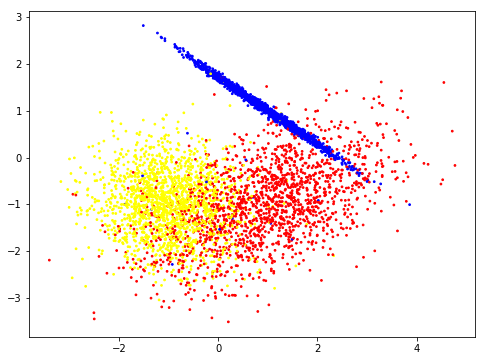

In [23]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1],s=3, cmap=colors)
pylab.show()

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
k_range_values = range(1,100,1)
scores = []
for k in k_range_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(clf, classification_problem[0], classification_problem[1], cv=5))
    scores.append(score)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

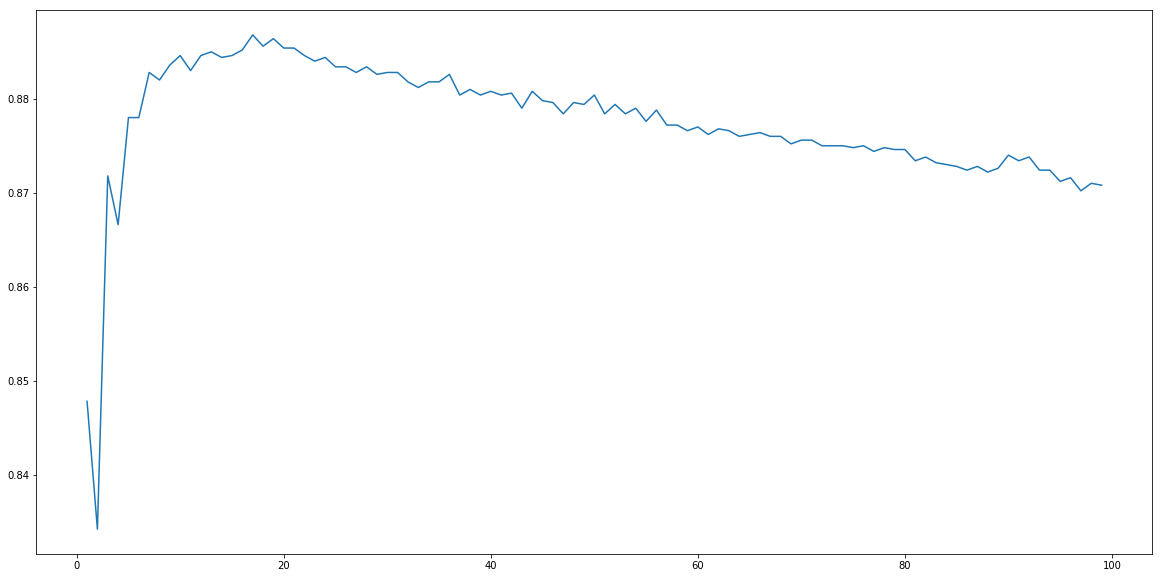

In [7]:
plt.figure(figsize=(20,10))
plt.plot(k_range_values, scores)
plt.show()

In [8]:
winner = k_range_values[scores.index(np.max(scores))]
print(winner)

17


In [20]:
clf = neighbors.KNeighborsClassifier(n_neighbors=winner)

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

In [14]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

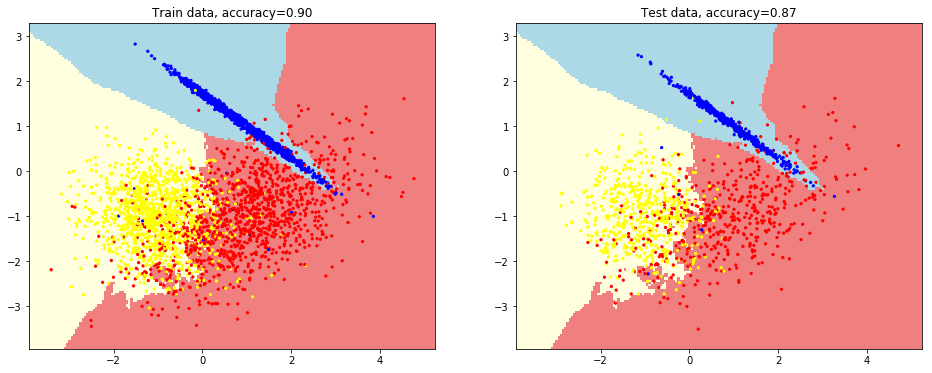

In [21]:

#set figure size
pyplot.figure(figsize = (16, 6))

#plot decision surface on the train data 
pyplot.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 5, cmap = colors)
pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, clf.predict(train_data))))

#plot decision surface on the test data
pyplot.subplot(1,2,2)
pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 5, cmap = colors)
pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, clf.predict(test_data))))
pyplot.show()